In [1]:
import cma, mo
%pylab nbagg
%matplotlib notebook
# Set parameters
dimension = 10
num_kernels = 5

list_of_solvers = mo.get_cmas(num_kernels * [dimension * [1]], 0.2)
moes = mo.Sofomore(list_of_solvers, reference_point = [11,11])



Populating the interactive namespace from numpy and matplotlib


In [2]:
fitness = mo.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
#g1 = lambda x: x[0] > 0.3
while not moes.stop():
    #for i in range(1):
    solutions = moes.ask()
    objective_values = [fitness(x) for x in solutions]
 #   g_values = [g(x) for x in solutions]
 #   moes.tell(solutions, objective_values, [g_values])
    moes.tell(solutions, objective_values)
    moes.disp()
    moes.logger.add()


Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     10 1.100000000000000e+01 1.0e+00 2.00e-01  2e-01  2e-01
    2     20 2.943550456091493e+01 1.0e+00 2.00e-01  2e-01  2e-01
    3     30 2.945797208869254e+01 1.0e+00 1.92e-01  2e-01  2e-01
  100   1000 9.461131054728740e+01 1.7e+00 1.15e-01  9e-02  1e-01
  200   2000 9.709508589483285e+01 1.7e+00 3.67e-02  2e-02  3e-02
  300   3000 9.723296870486747e+01 2.0e+00 1.26e-02  7e-03  9e-03
  400   4000 9.724052315645045e+01 2.0e+00 3.95e-03  2e-03  2e-03
  500   5000 9.724105480184654e+01 2.1e+00 1.31e-03  5e-04  7e-04
  600   6000 9.724109648969447e+01 2.3e+00 3.31e-04  1e-04  2e-04
  700   7000 9.724109815150814e+01 2.5e+00 8.83e-05  3e-05  3e-05
  800   8000 9.724109829644472e+01 2.3e+00 2.92e-05  7e-06  9e-06
  900   9000 9.724109830295447e+01 2.2e+00 9.11e-06  2e-06  3e-06
  981   9660 9.724109830344126e+01 2.1e+00 4.20e-06  8e-07  1e-06


In [3]:
a = moes.logger.load('outsofomore/hypervolume.dat')

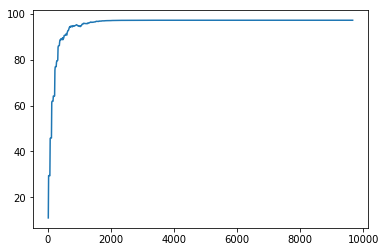

In [8]:
moes.logger.plot('outsofomore/hypervolume.dat')

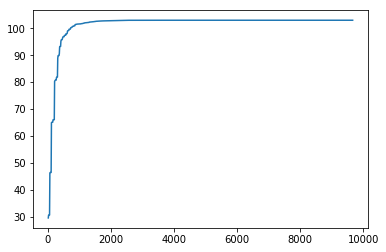

In [9]:
moes.logger.plot('outsofomore/hypervolume_archive.dat')

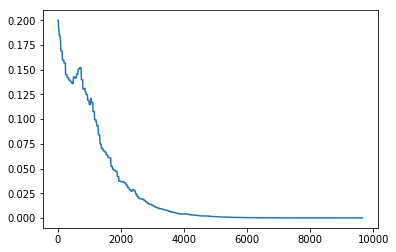

In [13]:
moes.logger.plot('outsofomore/median_sigmas.dat')

In [ ]:
cma.plot('cma_kernels/4')

In [ ]:
if moes.nda is None:
    moes.nda = BNDSL if len(objective_values[0]) == 2 else NDL
for i in range(len(moes._told_indices)):
    moes.kernels[moes._told_indices[i]].objective_values = objective_values[i]

if moes.reference_point is None:
    pass #write here the max among the kernel.objective_values       
moes.front = moes.nda([kernel.objective_values for kernel in moes.kernels],
                 moes.reference_point)



In [ ]:
ikernel, offspring = moes._offspring[0]

In [ ]:
start = len(moes._told_indices)

In [ ]:
print(start)

In [ ]:
kernel = moes.kernels[ikernel]
fit = kernel.objective_values
if fit in moes.front: # i.e. if fit is not dominated and dominates               # the reference point
    moes.front.remove(fit)

In [ ]:
hypervolume_improvements = [moes.front.hypervolume_improvement(
                    point) for point in objective_values[start:start+len(offspring)]]
moes.front.add(fit) # in case num_kernels > 1
            


In [ ]:
start

In [ ]:
constraints_values = [[g(x) for x in solutions]]

In [ ]:
g_values = [constraint[start:start+len(offspring)] \
            for constraint in constraints_values]
penalized_f_values = mo.RankPenalizedFitness([-float(u) for u in 
                    hypervolume_improvements], g_values)
